In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm, pinv
from numpy.random import randint
import pandas as pd

In [2]:
# Read red wine data from local csv
X = pd.read_csv('winequality-red.csv', delimiter=';')

# Separate targets t from data X
t = X.quality.values
X.drop('quality', axis=1, inplace=True)

In [3]:
# Mean squared error function
def MSE(X, w, t):
    residuals = X @ w - t
    N = X.shape[0]
    return np.dot(residuals, residuals) / N

In [4]:
X_dag = pinv(X)    # dag = dagger for Moore-Penrose
w_ML = X_dag @ t

# Get MSE of w*
MSE(X, w_ML, t)

0.4170492248204846

In [5]:
# Least-Mean-Squares Algorithm
def LMS(X, t, iterations, w_ML=None):
    w = np.zeros(X.shape[1])                       # Inital w is 0
    N = X.shape[0]                                 # N = # of rows in X
    unif_draws = randint(0, N, size=iterations)    # Pre-compute random draws
    w_dist = []
    for n in unif_draws:
        if w_ML is not None:
            w_dist.append(norm(w - w_ML))          # Compute distance from w*
        t_n = t[n]                                 # n-th target
        X_n = X.loc[n, :]                          # n-th row of X
        w = w + (t_n - np.dot(w, X_n)) / (norm(X_n) ** 2) * X_n   # Update w
    if w_ML is not None:
        w_dist.append(norm(w - w_ML))
    return w, w_dist

In [6]:
# Get 100,000th iteration of LMS and its convergence history
w_LMS, w_dist = LMS(X, t, 100000, w_ML=w_ML)

In [7]:
# Get MSE of 100,000th iteration of LMS
MSE(X, w_LMS, t)

0.48729553006461557

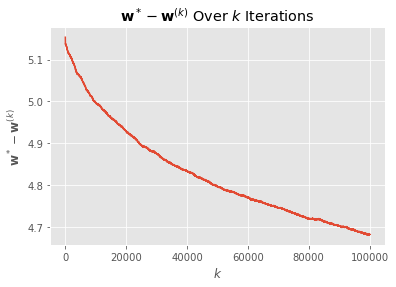

In [8]:
# Plot convergence to w*
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_title(r'$\mathbf{w}^* - \mathbf{w}^{(k)}$ Over $k$ Iterations')
ax.set_xlabel('$k$')
ax.set_ylabel(r'$\mathbf{w}^* - \mathbf{w}^{(k)}$')
ax.plot(range(100001), w_dist)